# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

**Product categories description (features)**

Note (m.u.) is shorthand for monetary units.
- Fresh: annual spending (m.u.) on fresh products (Continuous);
- Milk: annual spending (m.u.) on milk products (Continuous);
- Grocery: annual spending (m.u.) on grocery products (Continuous);
- Frozen: annual spending (m.u.) on frozen products (Continuous);
- Detergents_Paper: annual spending (m.u.) on detergents and paper products (Continuous);
- Delicatessen: annual spending (m.u.) on and delicatessen products (Continuous);
- Channel: {Hotel/Restaurant/Cafe - 1, Retail - 2} (Nominal)
- Region: {Lisnon - 1, Oporto - 2, or Other - 3} (Nominal)

In [109]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    # create pandas DataFrame
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [110]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [111]:
# TODO: Select three indices of your choice you wish to sample from the dataset
# selected [10, 220, 332], [17, 356, 430] [184, 289, 372]  [10, 184, 332]
indices = [10, 184, 332]

 
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,327,918,4710,74,334,11
2,22321,3216,1447,2208,178,2602


**The visual comparison of sample customers**

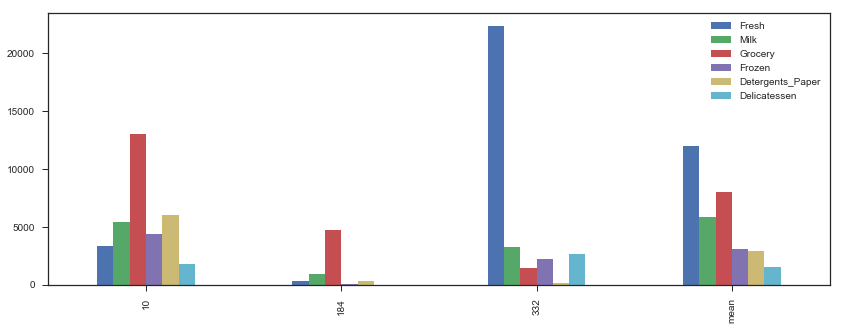

In [158]:
import seaborn as sns

# get mean data from 'describe' table
mean_data = data.describe().loc['mean', :]
# append mean data to the samples data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(14,5))

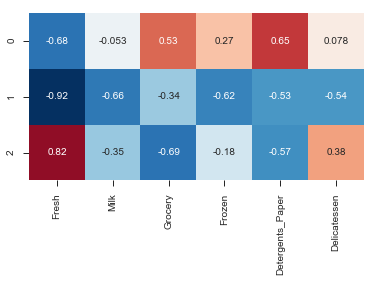

In [113]:
import seaborn as sns

sns.heatmap((samples-data.mean())/data.std(ddof=0), annot=True, cbar=False, square=True)

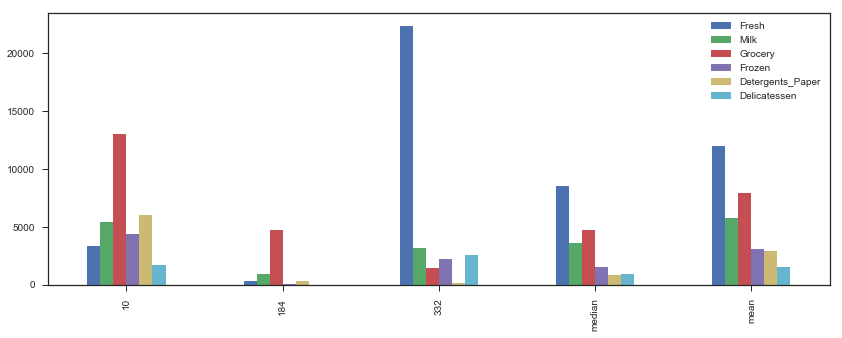

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

samples_for_plot = samples.copy()
samples_for_plot.loc[3] = data.median()
samples_for_plot.loc[4] = data.mean()

labels = indices + ['median'] + ['mean']
samples_for_plot.plot(kind='bar', figsize=(14,5))
plt.xticks(range(5),labels)
plt.show()

In [115]:
# HELPERS

import time

def duration(start_time, end_time):
    computing_time = end_time - start_time
    m, s = divmod(computing_time, 60)
    h, m = divmod(m, 60)
    return "Computing time [h:m:s]: {0:.0f}:{1:.0f}:{2:.1f} ".format(h,m,s)
    
def very_deep_copy(self):
    return pd.DataFrame(self.values.copy(), self.index.copy(), self.columns.copy())
    
# test    
start = time.time()

do_something = 0
for i in range(1,10000000):
    do_something = do_something + 2
    
end = time.time()

print duration(start, end)


Computing time [h:m:s]: 0:0:1.7 


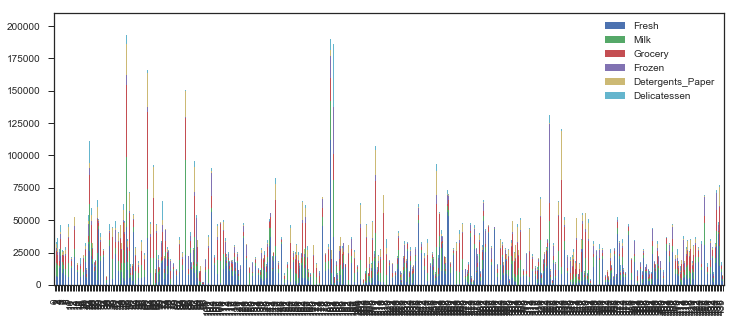

In [116]:
import matplotlib.pyplot as plt

data.plot(kind = 'bar', stacked = True, figsize = {5, 12});

** TOP 5 Clients by Features **

In [117]:
data_copy = very_deep_copy(data)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
181,112151,29627,18148,16745,4948,8550
125,76237,3473,7102,16538,778,918
284,68951,4411,12609,8692,751,2406
39,56159,555,902,10002,212,2916
258,56083,4563,2124,6422,730,3321


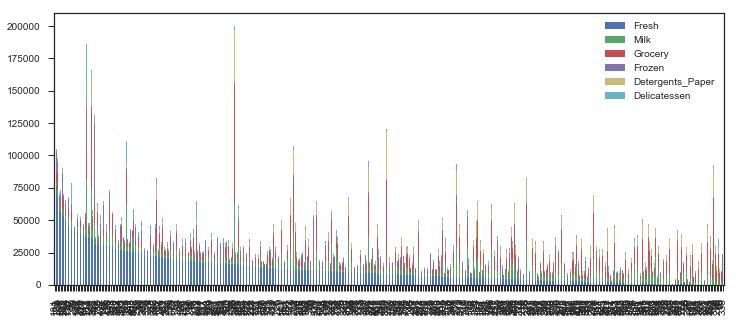

In [118]:
# set feature name
ftr = 'Fresh'
# sort values by the feature
df = data_copy.sort_values(ftr, ascending = False)
# move actual feature to the first position
df = df.reindex_axis([ftr] + list([a for a in df.columns if a != ftr]), axis=1)
# display top 5 table
display( df.head())
# show graph
df.plot(kind = 'bar', stacked = True, figsize = {5, 12});

,Frozen,Fresh,Milk,Grocery,Detergents_Paper,Delicatessen
325,60869,32717,16784,13626,1272,5609
183,36534,36847,43950,20170,239,47943
93,35009,11314,3090,2062,71,2698
196,18711,30624,7209,4897,763,2876
103,18028,56082,3504,8906,1480,2498


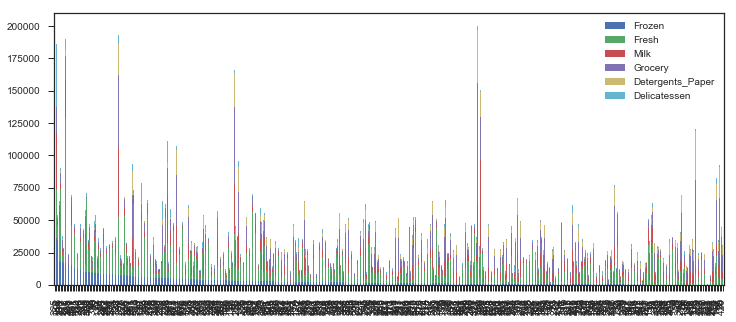

In [119]:
# set feature name
ftr = 'Frozen'
# sort values by the feature
df = data_copy.sort_values(ftr, ascending = False)
# move actual feature to the first position
df = df.reindex_axis([ftr] + list([a for a in df.columns if a != ftr]), axis=1)
# display top 5 table
display( df.head())
# show graph
df.plot(kind = 'bar', stacked = True, figsize = {5, 12});

,Delicatessen,Fresh,Milk,Grocery,Frozen,Detergents_Paper
183,47943,36847,43950,20170,36534,239
23,16523,26373,36423,22019,5154,4337
71,14472,18291,1266,21042,5373,4173
87,14351,43265,5025,8117,6312,1579
181,8550,112151,29627,18148,16745,4948


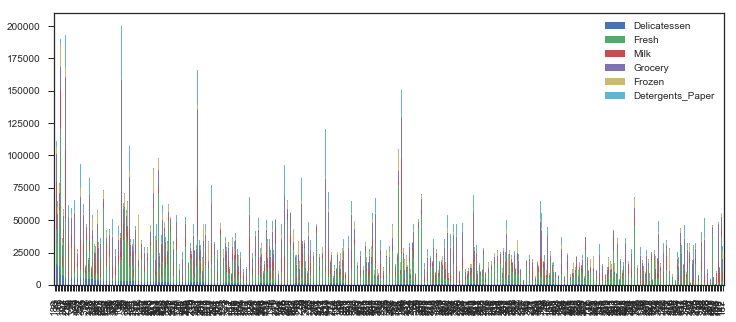

In [120]:
# set feature name
ftr = 'Delicatessen'
# sort values by the feature
df = data_copy.sort_values(ftr, ascending = False)
# move actual feature to the first position
df = df.reindex_axis([ftr] + list([a for a in df.columns if a != ftr]), axis=1)
# display top 5 table
display( df.head())
# show graph
df.plot(kind = 'bar', stacked = True, figsize = {5, 12});

,Grocery,Fresh,Milk,Frozen,Detergents_Paper,Delicatessen
85,92780,16117,46197,1026,40827,2944
333,67298,8565,4980,131,38102,1215
61,59598,35942,38369,3254,26701,2017
47,55571,44466,54259,7782,24171,6465
65,45828,85,20959,36,24231,1423


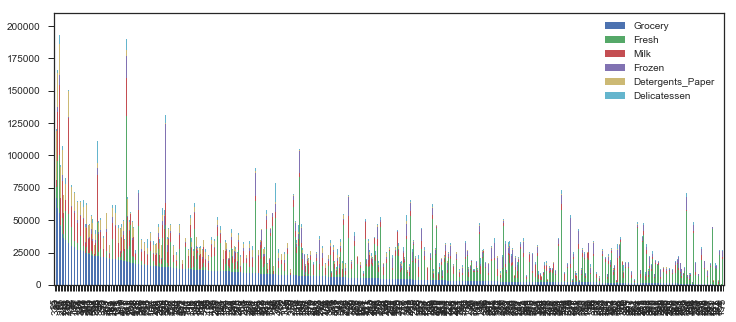

In [121]:
# set feature name
ftr = 'Grocery'
# sort values by the feature
df = data_copy.sort_values(ftr, ascending = False)
# move actual feature to the first position
df = df.reindex_axis([ftr] + list([a for a in df.columns if a != ftr]), axis=1)
# display top 5 table
display( df.head())
# show graph
df.plot(kind = 'bar', stacked = True, figsize = {5, 12});

,Detergents_Paper,Fresh,Milk,Grocery,Frozen,Delicatessen
85,40827,16117,46197,92780,1026,2944
333,38102,8565,4980,67298,131,1215
61,26701,35942,38369,59598,3254,2017
65,24231,85,20959,45828,36,1423
47,24171,44466,54259,55571,7782,6465


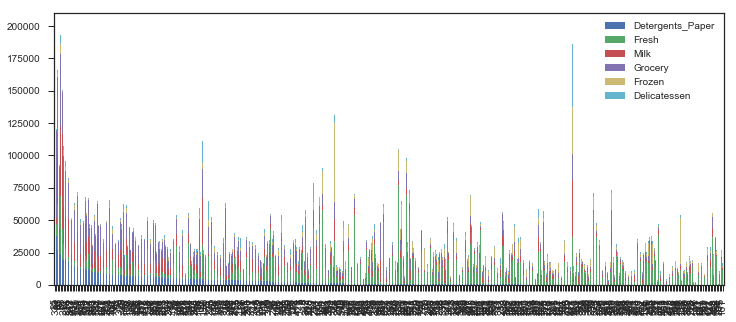

In [122]:
# set feature name
ftr = 'Detergents_Paper'
# sort values by the feature
df = data_copy.sort_values(ftr, ascending = False)
# move actual feature to the first position
df = df.reindex_axis([ftr] + list([a for a in df.columns if a != ftr]), axis=1)
# display top 5 table
display( df.head())
# show graph
df.plot(kind = 'bar', stacked = True, figsize = {5, 12});

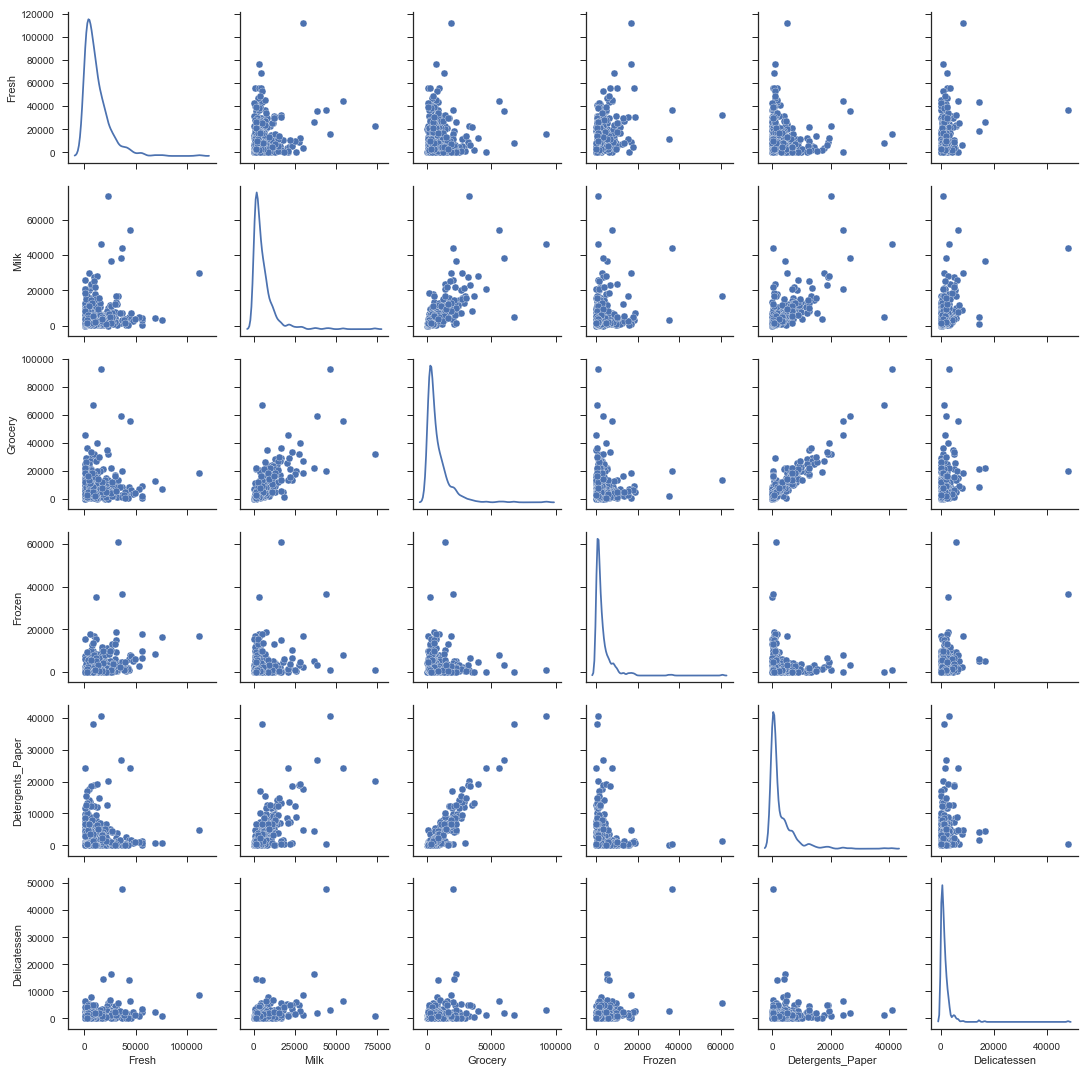

In [123]:
g = sns.pairplot(data, diag_kind = 'kde')

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Trying to understand the data better I did some extra data exploration I tried to find some feature dependency on the first view, therefore I created 'seaborn.pairplot' graph. There are some dependences to see as for example between 'Detergents_Paper' and 'Grocery', Milk', also between 'Grocery' and 'Milk'


***Assumptions on customers profiles***

RESTAURANT - are cooking from fresh food, therefore they buy more 'Fresh' in contrast to the 'Grocery' and 'Delicatessen'

HOTEL - assuming that hotels have own restaurants it is similar to restaurants, but they may have buy also more 'Frozen' food and  'Delicatessen'  

CAFE - usualy not preparing meals from the fresh food, buying less 'Fresh' and buy more 'Delicatessen'. I also expect more spending on 'Detergents_Paper'

MARKET and RETAIL - assumig they are nearing to average distribution among all product categories, comparing to other customer types they buy more 'Grocery', 'Frozen' and 'Detergents_Paper'

Based on this assupmtions I choose followin three samples. 


 - Sample 10: Supermarket
 
 Major spending on 'Grocery', spending on 'Fresh' significantly under average all other spendings  above average
 
 
 - Sample 184: Small market shop 
 
 Under average total spending. Major spending on 'Grocery'. All other spendigs very low. It looks like small grocery shop in a village or other rural area.
 
 
 - Sample 332: Restaurant
 
 High spending on 'Fresh', 'Delicatessen' above average, very low on 'Grocery'. All other below average.

 

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [124]:
print display(data.head(n = 4))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788


None


In [125]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
# drop_feature = 'Detergents_Paper'
drop_feature = 'Detergents_Paper'

X_inputs = very_deep_copy(data)
y_targets = X_inputs[drop_feature]
X_inputs.drop([drop_feature], axis=1, inplace = True)

print display(y_targets.head(n = 4))

print display(X_inputs.head(n = 4))

0    2674
1    3293
2    3516
3     507
Name: Detergents_Paper, dtype: int64

None


,Fresh,Milk,Grocery,Frozen,Delicatessen
0,12669,9656,7561,214,1338
1,7057,9810,9568,1762,1776
2,6353,8808,7684,2405,7844
3,13265,1196,4221,6404,1788


None


In [126]:

from sklearn.model_selection import train_test_split
# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(X_inputs, y_targets, test_size = 0.25, random_state = 44)

from sklearn.tree import DecisionTreeRegressor
# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state = 43).fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print "Coefficient of determination R^2 of the prediction: ", score

Coefficient of determination R^2 of the prediction:  0.7999433769


In [127]:
features_list = data.columns

for drop_feature in features_list:
    X_inputs = very_deep_copy(data)
    y_targets = X_inputs[drop_feature]
    X_inputs.drop([drop_feature], axis=1, inplace = True)
    X_train, X_test, y_train, y_test = train_test_split(X_inputs, y_targets, test_size = 0.25, random_state = 44)
    regressor = DecisionTreeRegressor(random_state = 43).fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    print "Coefficient of determination R^2 of the prediction for {0}: {1}".format(drop_feature, score)

Coefficient of determination R^2 of the prediction for Fresh: -0.535986076223
Coefficient of determination R^2 of the prediction for Milk: 0.153975828252
Coefficient of determination R^2 of the prediction for Grocery: 0.817934560546
Coefficient of determination R^2 of the prediction for Frozen: -1.02738736702
Coefficient of determination R^2 of the prediction for Detergents_Paper: 0.7999433769
Coefficient of determination R^2 of the prediction for Delicatessen: 0.119706489241


In [128]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, X_test, y_train,y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=200):
    return np.array([calculate_r_2_for_feature(data,feature) 
                     for _ in range(200) ]).mean().round(4)

print "{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh'))
print "{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk'))
print "{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery'))
print "{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen'))
print "{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper'))
print "{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen'))

Fresh:            -0.7223
Milk:             0.0878
Grocery:          0.6827
Frozen:           -1.2531
Detergents_Paper:  0.6785
Delicatessen:     -3.3952


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

Based on the pairplots, it looks like that 'Detergents_Paper', 'Grocery' and 'Milk' are corellated. I tried to predict 'Detergents_Paper' and get quite high prediction score of 0.7999433769. This supports my assumption. 
The highest reported predictinon score Coefficient of determination R^2 is for 'Grocery' 0.817934560546. This shows non trivial amount of dependency. At least this two features can be reduced into one dimension.

The negative scores for 'Fresh', 'Frozen' are indicating independence, therefore both features are neccessary for identifying spending habits.


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

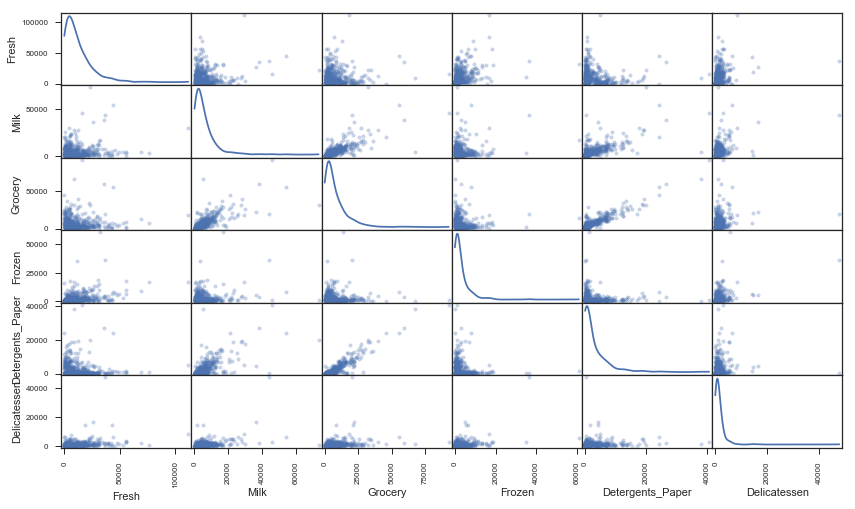

In [129]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

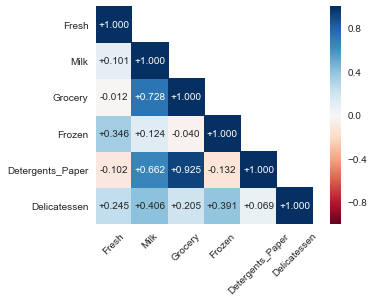

In [130]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

This graph is similar to the 'pairplot' graph, I used for the data exploration. As already mentioned, we can observe a dependency between 'Milk', 'Grocery' and 'Detergents_Paper'. Distribution of data shows positively skewed normal distribution or lognormal distribution. A transformation is necessary for further data exploration

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

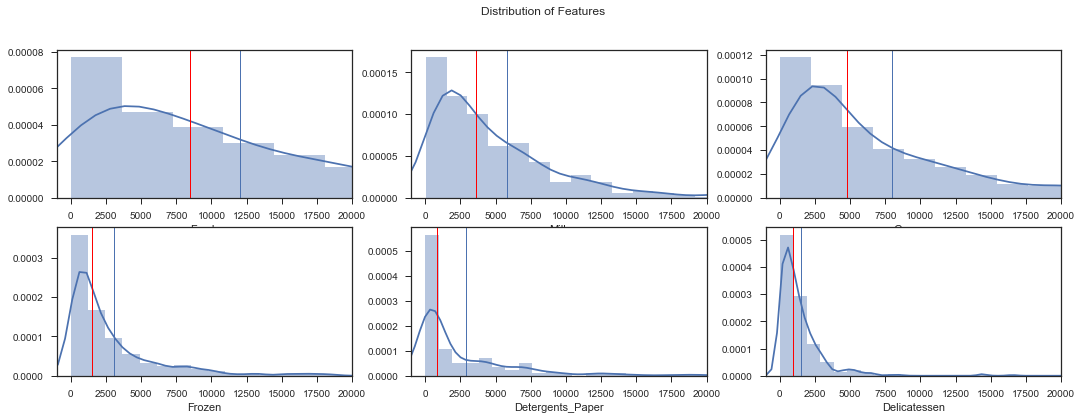

In [131]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

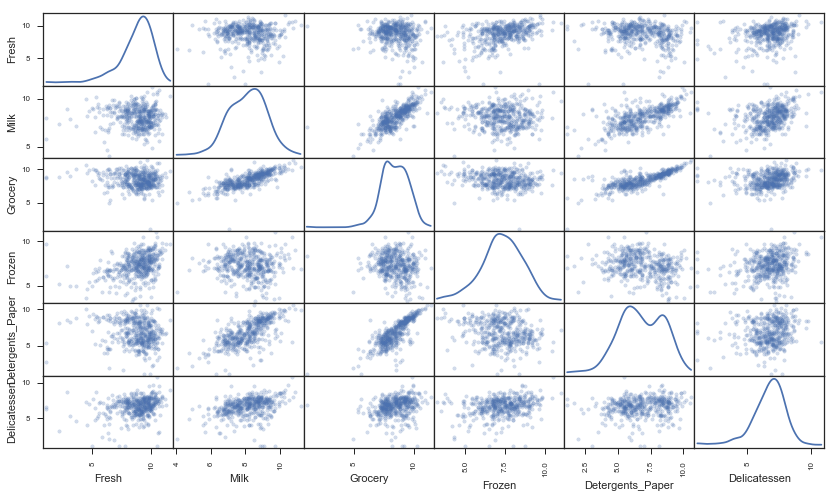

In [132]:
normal_data = very_deep_copy(data)

# TODO: Scale the data using the natural logarithm
log_data = data.apply(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.25, figsize = (14,8), diagonal = 'kde');

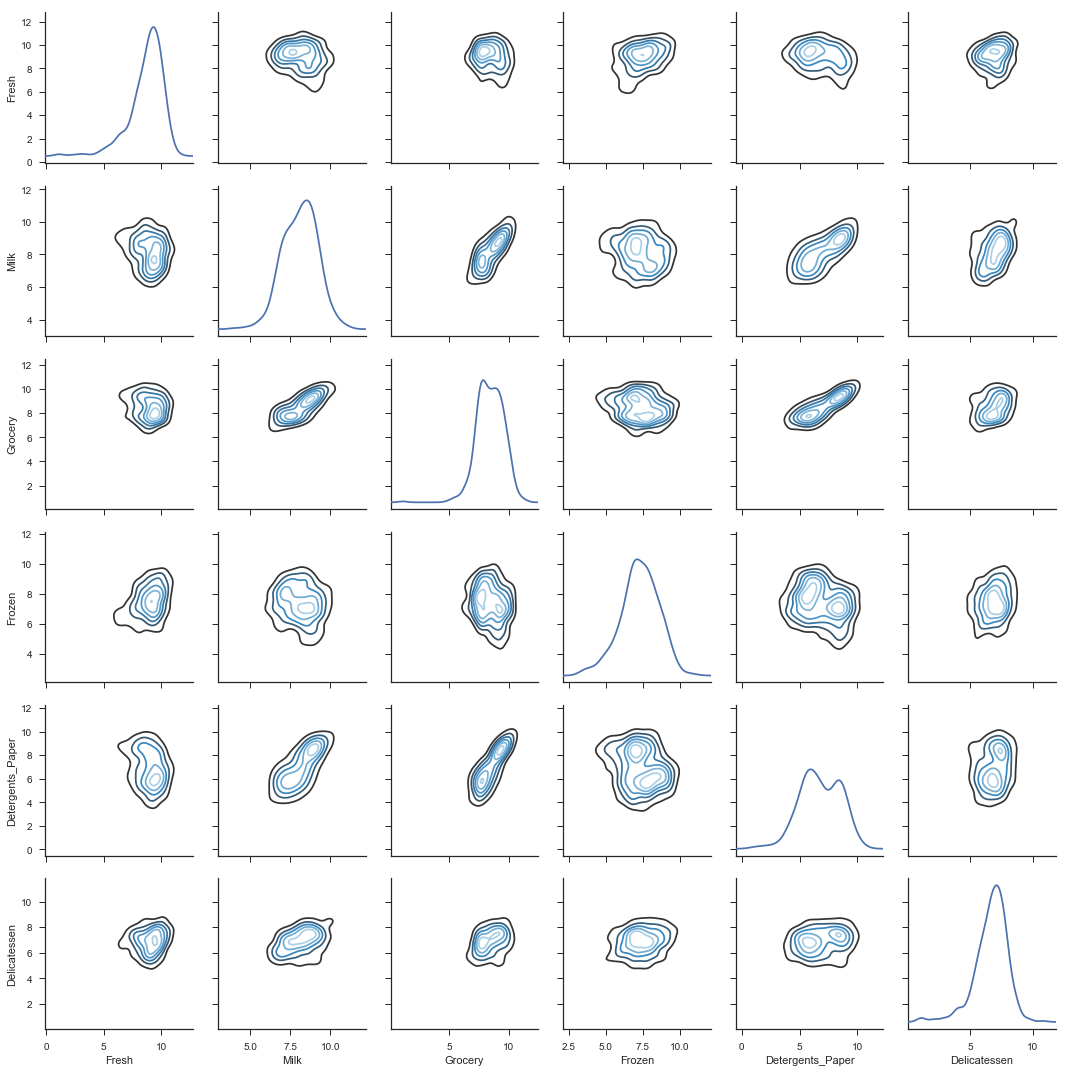

In [133]:
g = sns.PairGrid(log_data)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

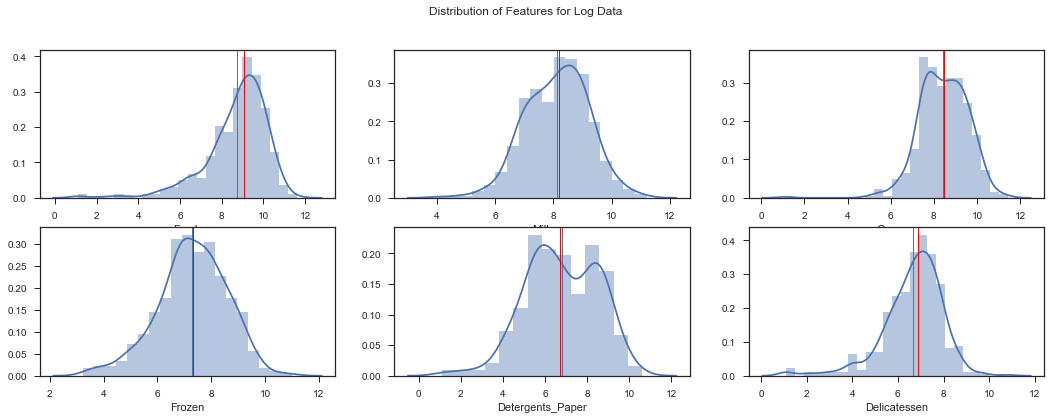

In [134]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

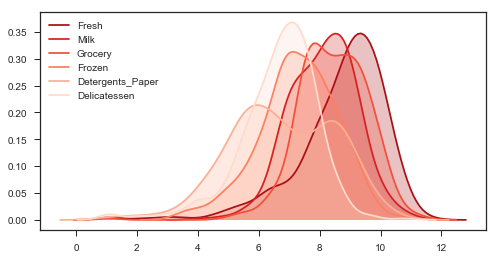

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc='best')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [136]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
1,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
2,10.013283,8.075894,7.277248,7.699842,5.181784,7.864036


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [137]:
# For each feature find the data points with extreme high or low values

all_outliers = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3 - Q1
    step = 1.5 * IQR
    
    # Display the outliers
    # The tilde sign ~ means not
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers_list = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers_list.sort_values(feature, ascending = False))
    
    for outlier in outliers_list.index:
        all_outliers.append(outlier)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [ 128, 154, 65, 66, 75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

count_observations = {}
for outlier in set(all_outliers):
    count_observations[outlier]= all_outliers.count(outlier) 
    if (count_observations[outlier] > 1):
        print "The record [%s] is an outlier for %s features"%(outlier,count_observations[outlier])
    



Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
305,5.493061,9.468001,9.088399,6.683361,8.271037,5.351858
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
355,5.247024,6.588926,7.606885,5.501258,5.214936,4.844187
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
353,4.762174,8.742574,9.961898,5.429346,9.069007,7.013016
412,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
343,7.431892,8.848509,10.177932,7.283448,9.646593,3.610918
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
289,10.663966,5.655992,6.154858,7.235619,3.465736,3.091042
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372
285,10.602965,6.461468,8.188689,6.948897,6.077642,2.890372
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
233,6.871091,8.513988,8.106515,6.842683,6.013715,1.945910


The record [128] is an outlier for 2 features
The record [154] is an outlier for 3 features
The record [65] is an outlier for 2 features
The record [66] is an outlier for 2 features
The record [75] is an outlier for 2 features


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

Tukey's method has identified quite large number of outliers. I think if algorithm identifies large number of outliers, the results must be reviewed. An outlier should be a data point which significantly differs from the majority. In this case I searched for 'outliers' which appear more features then one. 
Outliers: [ 128, 154, 65, 66, 75].

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

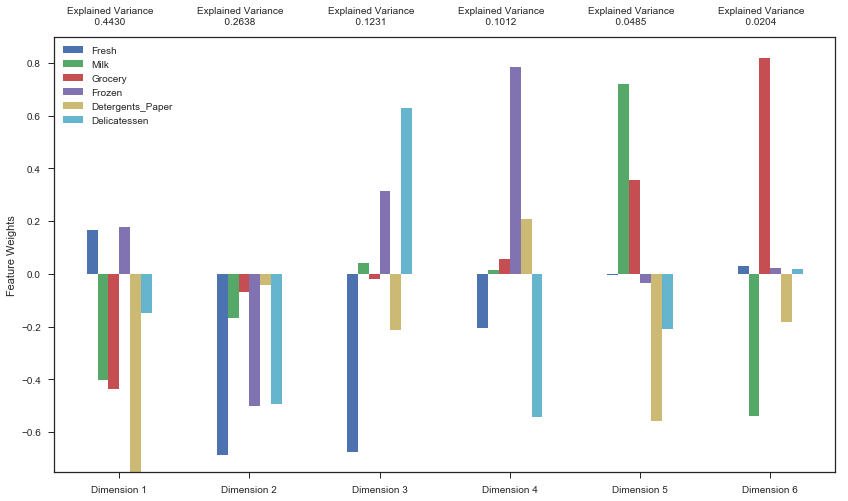

In [138]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [139]:
print pca_results['Explained Variance'].cumsum()

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


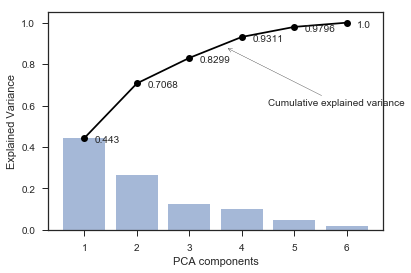

In [140]:
# create an x-axis variable for each pca component
x = np.arange(1,7)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative explained variance',
             xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xticks(range(1,7))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

**Analysis without outliers**

suggested by first reviewer

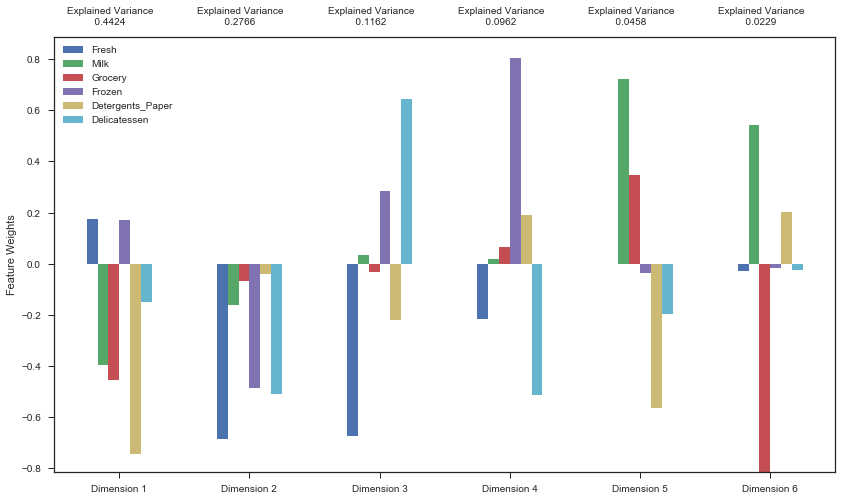

In [141]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca.fit(log_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(log_data, pca)

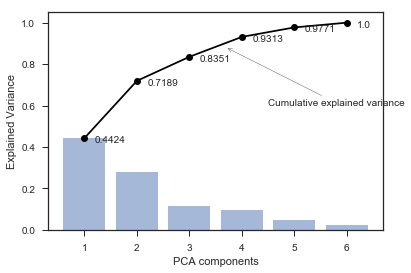

In [142]:
# create an x-axis variable for each pca component
x = np.arange(1,7)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_, align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative explained variance',
             xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)),xy=(i+.2,j-.02))
plt.xticks(range(1,7))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()

Analaysis without incorporating outliers show better results. First two pricipal components show Explained variance 0.7189 in contrast to 0.7068

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

The First and second principal component explains 70.68% of data variance in total. 

** The first principal component**  ~44% of customers  which spend money on 'Milk', 'Grocery' and 'Detergents_Paper' and spend nothing or very little on 'Fresh' and 'Frozen', or opposite - spending many money on 'Fresh' and 'Frozen' means less spending on other product categories

** The second principal component** ~26% of customers spend lot of on 'Fresh'  'Frozen'  'Delicatessen' buy also other products.

** The third principal component** ~12% of customers buy either 'Fresh' and 'Detergents_Paper'
'or 'Delicatessen' and 'Frozen'

** The fourth principal component**  ~10% of customers buy 'Frozen' then they buy less 'Delicatessen'  and 'Fresh' or opposite. 

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [143]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.1162,-0.7488,0.8007,1.0355,-0.5710,-0.2135
1,0.8424,5.9022,-1.4545,0.1970,0.5617,-0.6801
2,1.8549,-1.5289,0.4084,-0.9501,0.2169,0.5262


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [144]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [145]:
# without outlieres

# TODO: Apply PCA by fitting the good data with only two dimensions

pca2 = PCA(n_components=2).fit(log_data)

# TODO: Transform the good data using the PCA fit above
reduced_data2 = pca.transform(log_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data2 = pd.DataFrame(reduced_data2, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [146]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.0887,-0.7006
1,0.8750,5.9374
2,1.8549,-1.4598


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

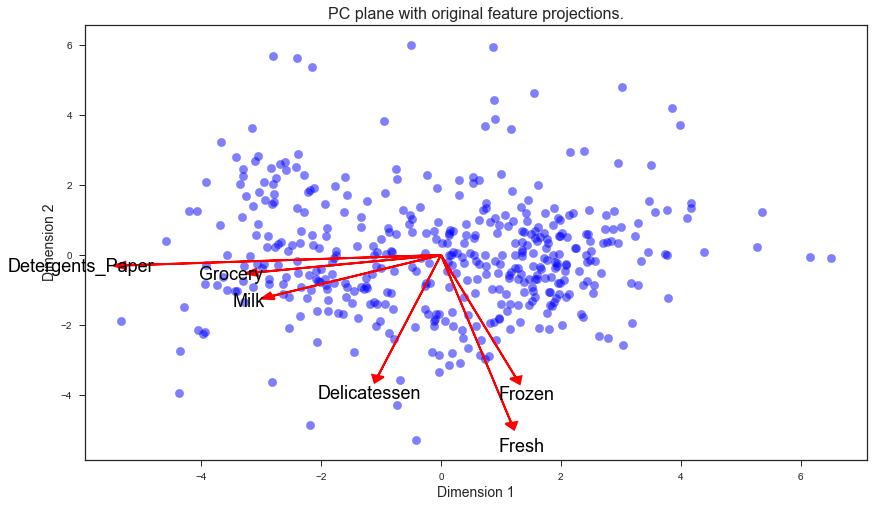

In [147]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

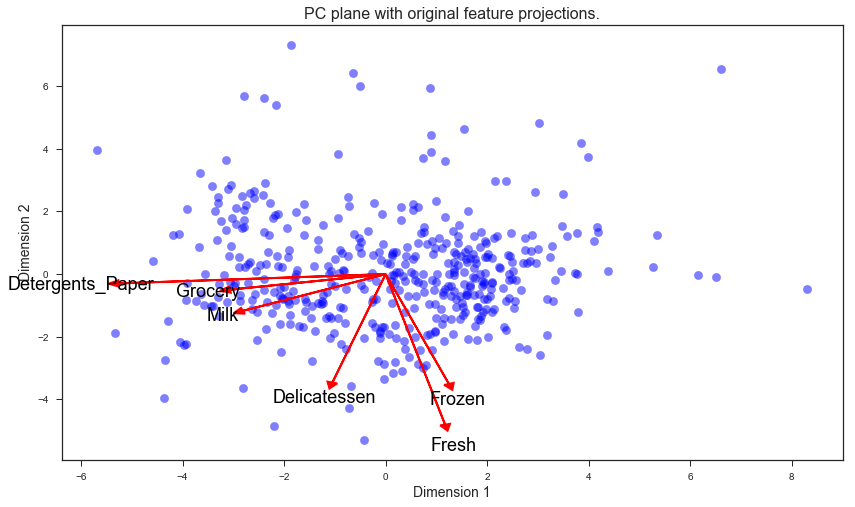

In [148]:
# Create a biplot
vs.biplot(log_data, reduced_data2, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

Advantages of using K-Means clustering algorithm:
- fast and efficient in terms of computational cost
- it is easy to interpret the clustering results
- works well with large datasets
- is simple to implement and to run


Advantages of using Gaussian Mixture Model clustering algorithm:
- is much more flexible than K-Means, K-Means is a special case of GMM
- it is the fastest algorithm for learning mixture models
- different options to constrain the covariance of the difference classes estimated: spherical, diagonal, tied or full covariance
- assigning probabilities instead of yes/no to data points about their membership allows to accomodate mixed membership

In this project we want to separate customer to different segments as horeca and retail. They can't be in both groups. Than is is less complicated to use K-Means algorithm. 


### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
 - Assign the silhouette score to `score` and print the result.

In [149]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

clusters_counts = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for nc in clusters_counts:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters = nc, random_state = 10).fit(reduced_data)
    # clusterer = GaussianMixture(n_components = 2, random_state = 10).fit(reduced_data)
    # clusterer = SpectralClustering(n_clusters = 2, random_state = 10).fit(reduced_data)
    # clusterer = AffinityPropagation().fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    from sklearn.metrics import silhouette_score
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)

    print "**** Results for {0} clusters".format(nc)
    print "KMeans                  ", "silhouette coefficient = ", score
    
    clusterer = GaussianMixture(n_components = nc, random_state = 10).fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    print "GaussianMixture         ", "silhouette coefficient = ", score

    preds = AgglomerativeClustering(n_clusters = nc).fit_predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    print "AgglomerativeClustering ", "silhouette coefficient = ", score

    from sklearn.cluster import Birch
    preds = Birch(n_clusters = nc).fit_predict(reduced_data)
    score = silhouette_score(reduced_data, preds)
    print "Birch                  ", "silhouette coefficient = ", score

    

**** Results for 2 clusters
KMeans                   silhouette coefficient =  0.426281015469
GaussianMixture          silhouette coefficient =  0.421916846463
AgglomerativeClustering  silhouette coefficient =  0.375068648335
Birch                   silhouette coefficient =  0.27651925019
**** Results for 3 clusters
KMeans                   silhouette coefficient =  0.390300538799
GaussianMixture          silhouette coefficient =  0.375532188938
AgglomerativeClustering  silhouette coefficient =  0.360139622934
Birch                   silhouette coefficient =  0.23618215086
**** Results for 4 clusters
KMeans                   silhouette coefficient =  0.332930419681
GaussianMixture          silhouette coefficient =  0.293269564847
AgglomerativeClustering  silhouette coefficient =  0.271623883344
Birch                   silhouette coefficient =  0.248352918104
**** Results for 5 clusters
KMeans                   silhouette coefficient =  0.352208874353
GaussianMixture          silhouette

In [150]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
nc = 2
clusterer = KMeans(n_clusters = nc, random_state = 10).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

from sklearn.metrics import silhouette_score
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

print "**** Results for {0} clusters".format(nc)
print "KMeans                  ", "silhouette coefficient = ", score

**** Results for 2 clusters
KMeans                   silhouette coefficient =  0.426281015469


In [151]:
# without outliers

# TODO: Apply your clustering algorithm of choice to the reduced data 
nc = 2
clusterer = KMeans(n_clusters = nc, random_state = 10).fit(reduced_data2)

# TODO: Predict the cluster for each data point
preds2 = clusterer.predict(reduced_data2)

# TODO: Find the cluster centers
centers2 = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

from sklearn.metrics import silhouette_score
# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data2, preds2)

print "**** Results for {0} clusters".format(nc)
print "KMeans                  ", "silhouette coefficient = ", score

**** Results for 2 clusters
KMeans                   silhouette coefficient =  0.419249062681


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

KMeans   0.426281015469

The best score is obtained for K-Means algorithm for 2 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

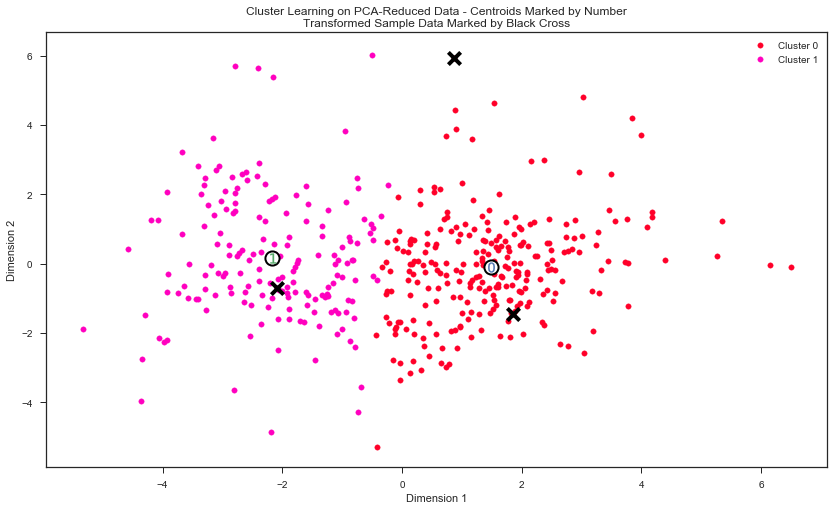

In [152]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

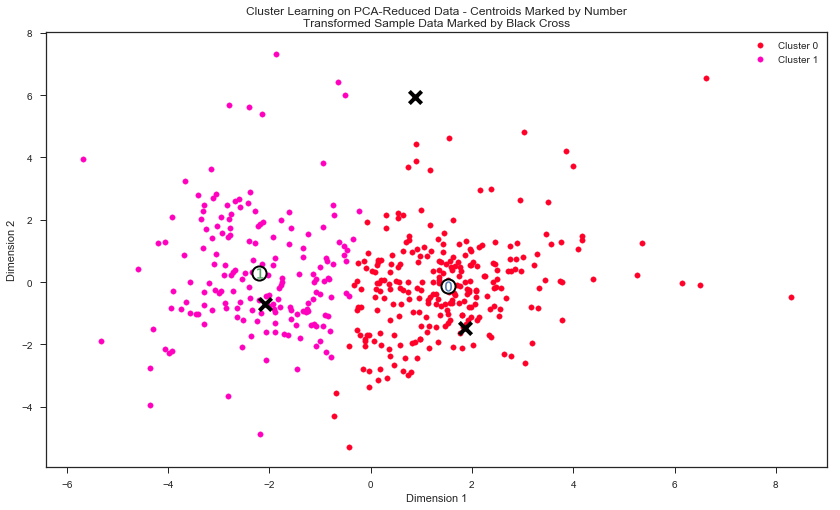

In [153]:
# without outliers

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data2, preds2, centers2, pca_samples)

Slightly differnt result without outliers. Red cluster moved to the left. Find for example two dots [-0.4, around 4]

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [92]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0


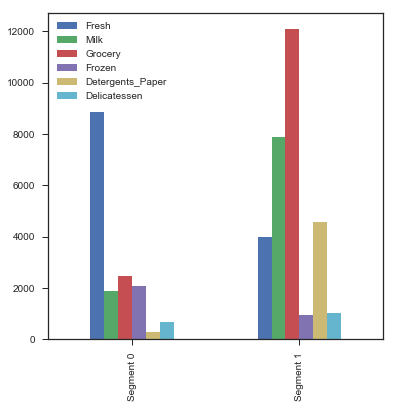

In [166]:
import seaborn as sns

# Plot bar plot
true_centers.plot(kind='bar', figsize=(6,6))

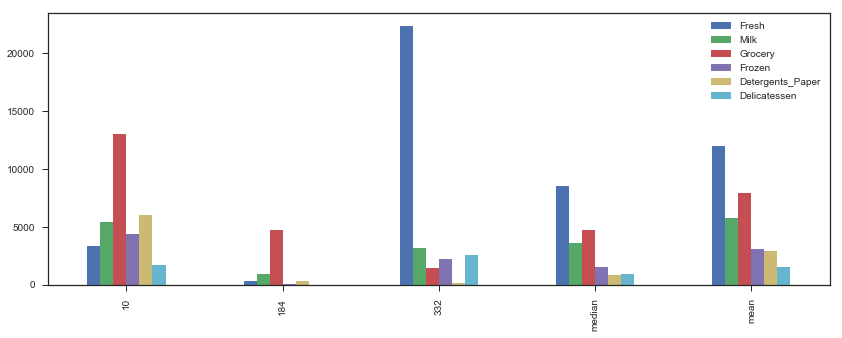

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

samples_for_plot = samples.copy()
samples_for_plot.loc[3] = data.median()
samples_for_plot.loc[4] = data.mean()

labels = indices + ['median'] + ['mean']
samples_for_plot.plot(kind='bar', figsize=(14,5))
plt.xticks(range(5),labels)
plt.show()

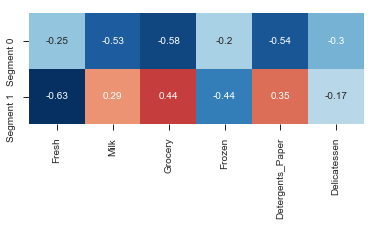

In [157]:
import seaborn as sns

sns.heatmap((true_centers-data.mean())/data.std(ddof=1), annot=True, cbar=False, square=True)
print

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

- Segment 0:  majority spending on 'Fresh' represents HORECA (Hotel, Restaurant, Cafe)
- Segment 1:  significant high spendig on 'Grocery' and 'Milk' represents retails and markets


***Intuitive Sample Segmentation***

The intutitive segementation is based on the comparison of the bar charts. Each segment has different product for major spending.  For these three samples I used simpe rule: major spending on 'Grocery' - > Segment 1, major spending on 'Fresh' -> Segment 0.

- Sample 10: Supermarket
Major spending on 'Grocery', spending on 'Fresh' significantly under average all other spendings above average

This customer should best indetify with the establishments represented by the feature set of Segment 0

- Sample 184: Small market shop 
Under average total spending. Major spending on 'Grocery'. All other spendigs very low. It looks like small grocery shop in a village or other rural area.

This customer should best indetify with the establishments represented by the feature set of Segment 0

- Sample 332: Restaurant
High spending on 'Fresh', 'Delicatessen' above average, very low on 'Grocery'. All other below average.

This customer should best indetify with the establishments represented by the feature set of Segment 1


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

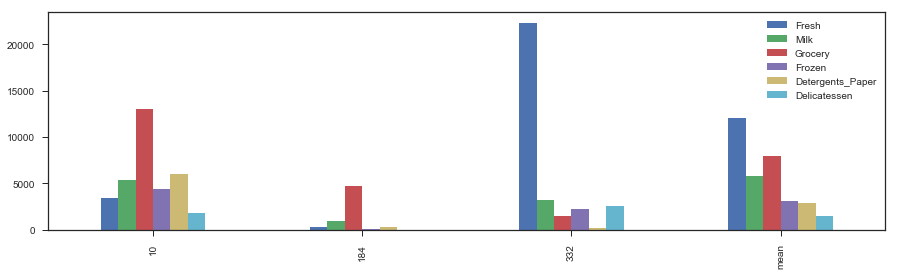

In [95]:
import seaborn as sns

# get mean data from 'describe' table
mean_data = data.describe().loc['mean', :]
# append mean data to the samples data
samples_bar = samples.append(mean_data)

# Construct indices
samples_bar.index = indices + ['mean']

# Plot bar plot
samples_bar.plot(kind='bar', figsize=(15,4))

In [96]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**

The first sample point is best represented by customer segment 1, and the third sampl point is best represented by segment0.
The model predicts that first and third sample points are associated with cluster 1 and cluster 0.
Second sample point is strange. Major spending is on 'Grocery' which should be segment 1 but algorithm predicted segment 0.
The reason may be this point is identified as an outlier for 'Delikatessen'.



## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

If the wholesale distributor changes delivery service from currently 5 days to 3 days a week, it will have different impact on customers. Simple logic says that customer which buys fresh food would be negatively impacted than customers buying more 'Frozen' and other foods. From the cluster perspective, wholesale distributor should consider which segments spends more money on fresh foods.
Another posibility is to test it. Create for groups of customers. Two A and B groups from cluster 0 and second A and B  groups from cluster 1. For a defined time period the A's will be serviced as before and the B's will be serviced by changed delivery.
We can measure some attributes, as total amount of spending, customer satisfaction,... and evaluate the reaction. 


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

The target variable will be customer segment 0 or 1. We can use engeneered feature as label to train supervised learning algorithm to predict customer segments. We can use Support Vector Machines or Decision Trees for example.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

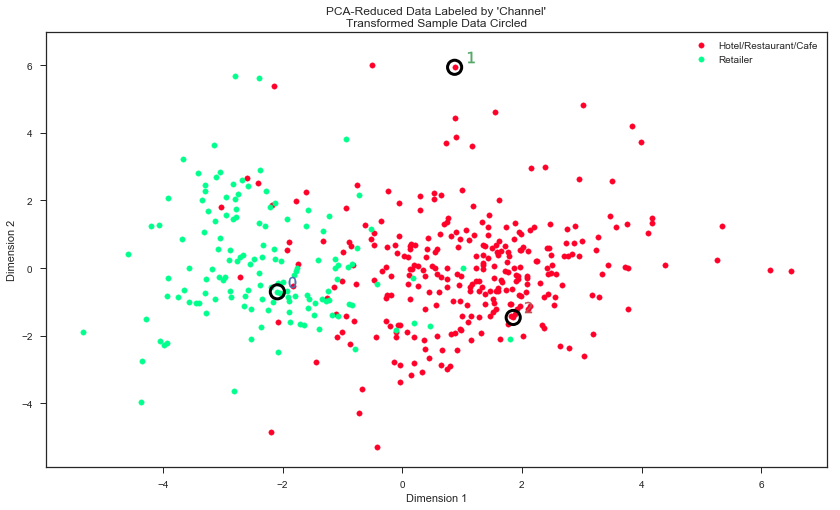

In [97]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**


Predictions of the clustering K-Mean algoritm:

- Sample point 0 predicted to be in Cluster 1
- Sample point 1 predicted to be in Cluster 0
- Sample point 2 predicted to be in Cluster 0

Channel Labels:

- Sample point 0 assigned to Retail
- Sample point 1 assigned to Horeca
- Sample point 2 assigned to Horeca

Prediction based on K-Mean algorithm matches with Channel labels. Classification is consistent with my previous definition of customer segemets.

Comparing Cluster and Channel visualisation, there is a number of customers which will be differently classified by the model and assigned chanel. 

- Customers with positive Dimmension 1 and Dimmension 2 will be classified purely as 'Hotels/Restaurants/Cafes'
- Customers with Dimmension 1 less than -3 will be classified purely as 'Retailers'


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.